In [1]:
import pandas as pd
import glob
import pyproj

In [2]:
to_concat = []
for ano in range(2011, 2023):
    df = pd.read_csv(glob.glob(f'*{ano}*.csv')[0], sep=';', encoding='latin1')
    df.columns = (
        df.columns.str.lower().
        str.replace('ç', 'c').
        str.replace('ã', 'a').
        str.strip()
    )
    to_concat.append(df)

In [3]:
df = pd.concat(to_concat)
data = df['data hora_boletim']
df['ano'] = data.str.split('/', expand=True)[2].str.split(' ', expand=True)[0].astype('int')
df['mes'] = data.str.split('/', expand=True)[1]
df

,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,...,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,ano,mes
0,9,31/12/2011 21:35,14/02/2012 00:00,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,26,...,81070137.00,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2011,12
1,161,31/12/2011 22:16,14/02/2012 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,1,BOM,1,ASFALTO,18,...,0.00,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2011,12
2,198,01/01/2011 00:50,10/02/2011 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,19,...,79731533.00,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2011,01
3,223,01/01/2011 00:20,10/02/2011 00:00,H04000,QUEDA DE PESSOA DE VEICULO ...,1,BOM,1,ASFALTO,20,...,79710700.00,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2011,01
4,246,31/12/2011 23:39,09/01/2012 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,20,...,79729531.00,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12143,2022-054271937-001,05/08/2022 14:33,12/12/2022 18:12,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,...,7804608.54,SIM,NÃO,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,08
12144,2022-054275781-001,12/12/2022 17:32,12/12/2022 18:35,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,23,...,0.00,SIM,NÃO,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12
12145,2022-054276901-001,12/12/2022 18:40,12/12/2022 18:40,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,22,...,7790628.88,SIM,NÃO,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12
12146,2022-054277884-001,12/12/2022 18:30,12/12/2022 18:47,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,26,...,7808938.99,SIM,NÃO,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12


In [4]:
proj = pyproj.Proj('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs +type=crs')
df['lat'], df['lon'] = proj(
    df.coordenada_x.values, 
    df.coordenada_y.values,
    inverse=True
)

(0       -43.931635
 1       -43.960682
 2       -43.941838
 3       -43.971828
 4       -43.925943
            ...    
 12142   -43.995179
 12143   -43.934134
 12145   -43.987525
 12146   -43.959215
 12147   -43.927701
 Name: lat, Length: 75619, dtype: float64,
 0       -19.905752
 1       -19.882689
 2       -19.917458
 3       -19.926938
 4       -19.926579
            ...    
 12142   -19.989084
 12143   -19.851414
 12145   -19.978041
 12146   -19.812434
 12147   -19.847045
 Name: lon, Length: 75619, dtype: float64)

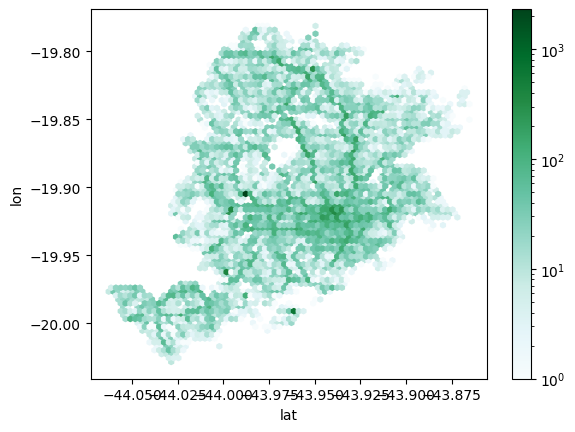

In [22]:
import numpy as np


df_filt = df[df['lat'] != np.inf]
df_filt = df_filt[df_filt['lat'] > -80]
df_filt.plot(kind='hexbin', x='lat', y='lon',mincnt=1,
    gridsize=75,
    bins='log'
)
df_filt['lat'], df_filt['lon']

<Axes: xlabel='mes'>

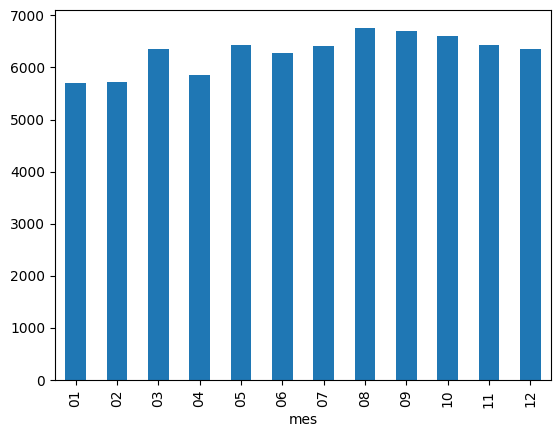

In [23]:
df_filt.groupby(['mes']).size().plot.bar()

<Axes: xlabel='ano,mes'>

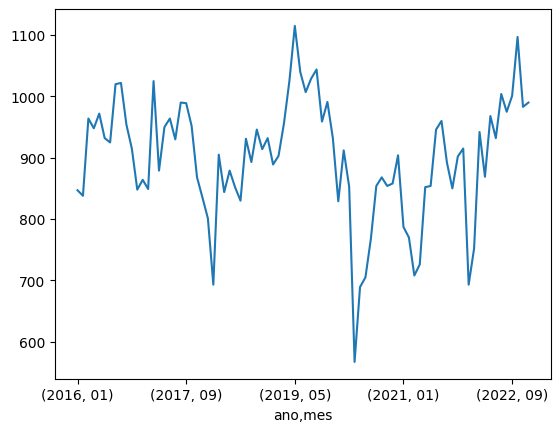

In [24]:
df_filt.groupby(['ano', 'mes']).size().plot.line()

In [26]:
df_filt.shape

(75619, 27)

In [49]:
bairros = pd.read_csv('https://raw.githubusercontent.com/alanwillms/geoinfo/master/latitude-longitude-bairros.csv', sep=';')
bairros = bairros[bairros.uf == 'MG']
bairros = bairros[bairros.municipio == 'Belo Horizonte']

In [50]:
from scipy.spatial.distance import cdist

distance = cdist(
    df_filt[["lat", "lon"]],
    bairros[["longitude", "latitude"]],
    metric="euclidean"
)

In [51]:
bairro_idx = distance.argmin(axis=1)

In [53]:
df_filt['bairro'] = bairros.iloc[bairro_idx]['bairro'].values

In [54]:
df_filt

,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,...,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,ano,mes,lat,lon,bairro
0,596171,09/01/2016 01:39,14/06/2016 00:00,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,21,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,01,-43.931635,-19.905752,Graça
1,618762,09/01/2016 14:15,20/06/2016 00:00,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,21,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,01,-43.960682,-19.882689,Nova Cachoeirinha
2,748480,11/01/2016 12:53,18/10/2016 00:00,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,19,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,01,-43.941838,-19.917458,Centro
3,779230,08/01/2016 18:40,20/06/2016 00:00,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,01,-43.971828,-19.926938,Calafate
4,822146,11/01/2016 01:30,20/06/2016 00:00,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,19,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,01,-43.925943,-19.926579,Funcionários
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142,2022-054269981-001,12/12/2022 17:46,12/12/2022 18:02,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,18,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12,-43.995179,-19.989084,Bonsucesso
12143,2022-054271937-001,05/08/2022 14:33,12/12/2022 18:12,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,08,-43.934134,-19.851414,Minaslândia (P Maio)
12145,2022-054276901-001,12/12/2022 18:40,12/12/2022 18:40,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,22,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12,-43.987525,-19.978041,Bonsucesso
12146,2022-054277884-001,12/12/2022 18:30,12/12/2022 18:47,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,26,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12,-43.959215,-19.812434,Venda Nova


<Axes: xlabel='0_x', ylabel='0_y'>

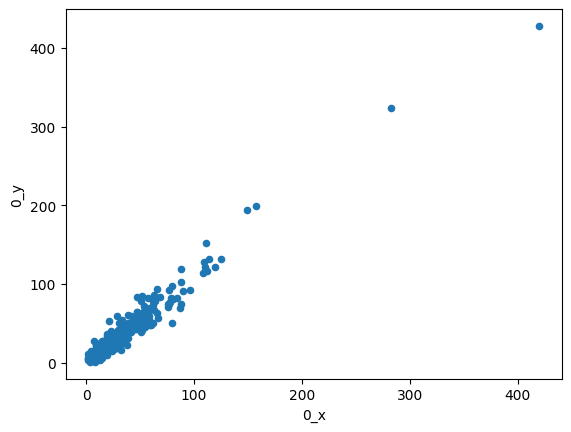

In [68]:
cont = df_filt.groupby(['bairro', 'ano']).size().reset_index()
dados_2019 = cont[cont.get('ano') == 2021]
dados_2022 = cont[cont.get('ano') == 2022]
dados_2019.merge(
    dados_2022,
    on='bairro'
).plot(kind='scatter', x='0_x', y='0_y')

In [55]:
for ano in range(2011, 2023):
    df_filt[df_filt.ano == ano].to_csv(f'../si-bol-{ano}.csv', sep=';', index=False)